In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
from sklearn import cluster
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

/Users/geraintianpalmer/Documents/DetectingDeadlockInQingNetworkSimulation/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
bound_data = []
file_name = 'data_for_graphs/ratio_bound_data.csv'
data_file = open(file_name, 'r')
rdr = csv.reader(data_file)
for row in rdr:
    bound_data.append([float(obs) for obs in row])

In [7]:
ns = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
ratios_inverse_ns_diff = [[1.0/row[-1] for row in bound_data if abs(row[4]-row[5]) == n] for n in ns]

In [10]:
print [len(row) for row in ratios_inverse_ns_diff]
print sum([len(row) for row in ratios_inverse_ns_diff])

[1200000, 2000000, 1600000, 1200000, 800000, 400000]
7200000


In [11]:
mean_0 = round(sum(ratios_inverse_ns_diff[0])/len(ratios_inverse_ns_diff[0]), 4)
mean_1 = round(sum(ratios_inverse_ns_diff[1])/len(ratios_inverse_ns_diff[1]), 4)
mean_2 = round(sum(ratios_inverse_ns_diff[2])/len(ratios_inverse_ns_diff[2]), 4)
mean_3 = round(sum(ratios_inverse_ns_diff[3])/len(ratios_inverse_ns_diff[3]), 4)
mean_4 = round(sum(ratios_inverse_ns_diff[4])/len(ratios_inverse_ns_diff[4]), 4)
mean_5 = round(sum(ratios_inverse_ns_diff[5])/len(ratios_inverse_ns_diff[5]), 4)

In [12]:
from scipy.stats import gaussian_kde

In [13]:
densities = [gaussian_kde(row) for row in ratios_inverse_ns_diff]

In [14]:
xs = [i/400.0 for i in range(400)]
ds = []
for dnsty in densities:
    dnsty.covariance_factor = lambda : 0.25
    dnsty._compute_covariance()
    ds.append(dnsty(xs))

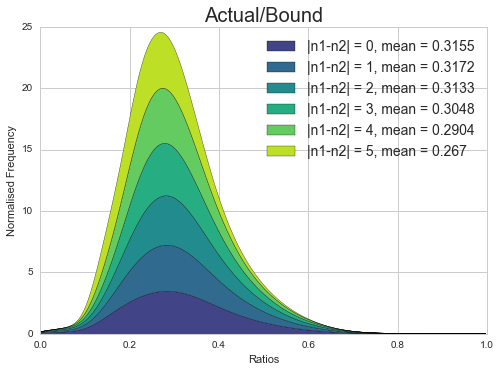

In [16]:
labs = ['|n1-n2| = 0, mean = '+str(mean_0), '|n1-n2| = 1, mean = '+str(mean_1), '|n1-n2| = 2, mean = '+str(mean_2), '|n1-n2| = 3, mean = '+str(mean_3), '|n1-n2| = 4, mean = '+str(mean_4), '|n1-n2| = 5, mean = '+str(mean_5)]
colormap = plt.cm.viridis
fig, ax = plt.subplots()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0.2, 0.9, len(ratios_inverse_ns_diff))])
plt.stackplot(xs, ds)
plt.xlabel('Ratios')
plt.ylabel('Normalised Frequency')
plt.legend(labs, fontsize=14)
ax.set_title('Actual/Bound', fontsize=20)
plt.show()